In [1]:
import pandas as pd
#ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('supershops.csv')

In [3]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [4]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()
df6 = df.copy()
df7 = df.copy()
df8 = df.copy()

In [6]:
x=df.drop('Profit',axis=1)

In [7]:
x.head()

,Marketing Spend,Administration,Transport,Area
0,114523.61,136897.80,471784.10,Dhaka
1,162597.70,151377.59,443898.53,Ctg
2,153441.51,101145.55,407934.54,Rangpur
3,144372.41,118671.85,383199.62,Dhaka
4,142107.34,91391.77,366168.42,Rangpur


In [8]:
y = df['Profit']

In [9]:
df.isnull().sum() #checking null values

Marketing Spend    0
Administration     0
Transport          1
Area               0
Profit             0
dtype: int64

In [10]:
#df.isnull()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        49 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [12]:
#df.isnull()

In [13]:
df[18:21] # to see the row from 18 to 20

,Marketing Spend,Administration,Transport,Area,Profit
18,91749.16,114175.79,294919.57,Rangpur,124266.90
19,86419.70,153514.11,NaN,Dhaka,122776.86
20,76253.86,113867.30,298664.47,Ctg,118474.03


# Measure of Central Tendency

In [14]:
df.Transport.mean() #no outliers

215331.7324489796

In [15]:
df.Transport.median() #outliers exist

214634.81

<Axes: xlabel='Transport', ylabel='Count'>

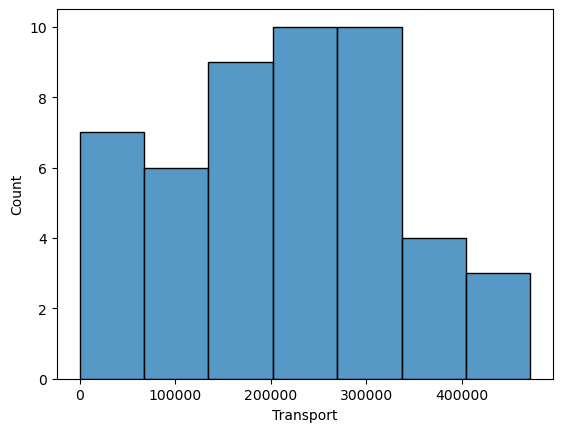

In [16]:
import seaborn as sns
sns.histplot(df.Transport)

In [17]:
mean = df.Transport.mean()
mean

215331.7324489796

In [18]:
df.Transport = df.Transport.fillna(mean)
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [19]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [20]:
mean

215331.7324489796

In [21]:
df[18:21]

,Marketing Spend,Administration,Transport,Area,Profit
18,91749.16,114175.79,294919.570000,Rangpur,124266.90
19,86419.70,153514.11,215331.732449,Dhaka,122776.86
20,76253.86,113867.30,298664.470000,Ctg,118474.03


# Sklearn Preprocessing

Read sklearn: [Docs](https://scikit-learn.org/stable/modules/preprocessing.html)

### Some common encoding techniques in machine learning:

1. Label Encoding <br>
2. One-Hot Encoding <br>
3. Binary Encoding <br>
4. Ordinal Encoding <br>
5. Frequency Encoding <br>
6. Mean Encoding <br>
7. Text Embedding <br>

# Label Encoding

Label encoding is a technique used to convert categorical data into numerical labels. Each unique category value is assigned a unique integer. This method is useful when the categorical feature does not have an inherent order and you need to convert the categories to numerical values for machine learning algorithms that can handle categorical variables as numbers.

## When to Use Label Encoding

Label encoding is appropriate when:
- The categorical feature does not have a meaningful order.
- You want to convert categorical values to unique integers for algorithms that can work with numerical labels.

## Steps to Perform Label Encoding

1. **Identify unique categories in the feature.**
2. **Assign a unique integer to each category.**

In [22]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

Watch it: [fit Vs. transform](https://youtu.be/0T3MpmbAHXg)

In [25]:
df1.Area = le.fit_transform(df[['Area']])

In [26]:
df1.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [27]:
le.classes_

array(['Ctg', 'Dhaka', 'Rangpur'], dtype=object)

In [28]:
le.transform(le.classes_)

array([0, 1, 2])

# Decode the encoded values back to original classes

In [29]:
#df.Area = decoded_classes = le.inverse_transform(df1.Area)
decoded_classes = le.inverse_transform(df1.Area)
decoded_classes

array(['Dhaka', 'Ctg', 'Rangpur', 'Dhaka', 'Rangpur', 'Dhaka', 'Ctg',
       'Rangpur', 'Dhaka', 'Ctg', 'Rangpur', 'Ctg', 'Rangpur', 'Ctg',
       'Rangpur', 'Dhaka', 'Ctg', 'Dhaka', 'Rangpur', 'Dhaka', 'Ctg',
       'Dhaka', 'Rangpur', 'Rangpur', 'Dhaka', 'Ctg', 'Rangpur', 'Dhaka',
       'Rangpur', 'Dhaka', 'Rangpur', 'Dhaka', 'Ctg', 'Rangpur', 'Ctg',
       'Dhaka', 'Rangpur', 'Ctg', 'Dhaka', 'Ctg', 'Ctg', 'Rangpur', 'Ctg',
       'Dhaka', 'Ctg', 'Dhaka', 'Rangpur', 'Ctg', 'Dhaka', 'Ctg'],
      dtype=object)

In [30]:
df1.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [31]:
#After decoding
df1.Area = decoded_classes
df1.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


# Label Encoding with Label mapping 

No Need just see

In [32]:
df.Area.unique()   

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [33]:
label_mapping = {
    'Dhaka': 1,
    'Rangpur': 2,
    'Ctg': 0
}

In [34]:
label_mapping

{'Dhaka': 1, 'Rangpur': 2, 'Ctg': 0}

In [35]:
label_mapping.keys()

dict_keys(['Dhaka', 'Rangpur', 'Ctg'])

In [36]:
label_mapping.values()

dict_values([1, 2, 0])

In [37]:
df2.Area = [label_mapping[area] for area in df2.Area] #List comprehension

In [38]:
df2.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [39]:
df3.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


# Replace Method

In [40]:
df3['Area'] = df3['Area'].replace(label_mapping)

In [41]:
df3.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


# One Hot Encoder

In [ ]:
df4.head()

In [ ]:
pd.get_dummies(df4['Area']).head()

In [ ]:
pd.get_dummies(df4['Area'], drop_first=True).head() #dummy var trap

In [ ]:
pd.get_dummies(df4['Area'], drop_first=True, prefix='Area').head()

In [ ]:
dummy = pd.get_dummies(df4['Area'], drop_first=True, prefix='Area', prefix_sep=' ' )

In [ ]:
dummy.head()

In [ ]:
df4.head()

In [ ]:
df.isnull().sum()

In [ ]:
df[18:21]

In [ ]:
mean=df.Transport.mean()
mean

In [ ]:
df.Transport=df.Transport.fillna(mean)

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df.Area=le.fit_transform(df[['Area']])

In [ ]:
df.head()

In [ ]:
df.Area.unique()

In [ ]:
label_mapping = {
    'Dhaka': 1,
    'Rangpur': 2,
    'Ctg': 0
}

In [ ]:
df2.Area = [label_mapping[area] for area in df2.Area]

In [ ]:
df2.head()

In [ ]:
df3.Area = df3.Area.replace(label_mapping)
df3.head()

In [ ]:
df4.head()

In [ ]:
dummy=pd.get_dummies(df['Area']).head()

In [ ]:
dummy.head()

In [ ]:
new_d4=pd.concat([df4,dummy],axis=1)

In [ ]:
new_d4.head()

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb=LabelBinarizer()
area_encoded=lb.fit_transform(df['Area'])

In [ ]:
area_encoded_df=pd.DataFrame(area_encoded,columns=lb.classes_)
area_encoded_df

In [ ]:
lb.classes_

In [ ]:
area_encoded_df=area_encoded_df.drop('Ctg',axis=1)
area_encoded_df.head()

In [ ]:
df6.Area.unique()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ordinal=OrdinalEncoder(categories=[['Dhaka', 'Rangpur','Ctg']])
ordinal

In [ ]:
df6.Area=ordinal.fit_transform(df5[['Area']])

In [ ]:
df6.Area.head()

In [ ]:
frequency=df.groupby('Area').value_counts().to_dict()
frequency